In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os

plt.style.use('default')

from tools.config import PREPROCESSED_DATA_DIR
os.makedirs(PREPROCESSED_DATA_DIR / 'synthetic', exist_ok=True)


In [4]:
def make_synthetic_data(n_samples, n_features, n_centers, noise, random_state=42):
    X, _ = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=random_state)
    X += np.random.normal(scale=noise, size=X.shape)
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X

X = make_synthetic_data(n_samples=1000, n_features=2, n_centers=3, noise=3)

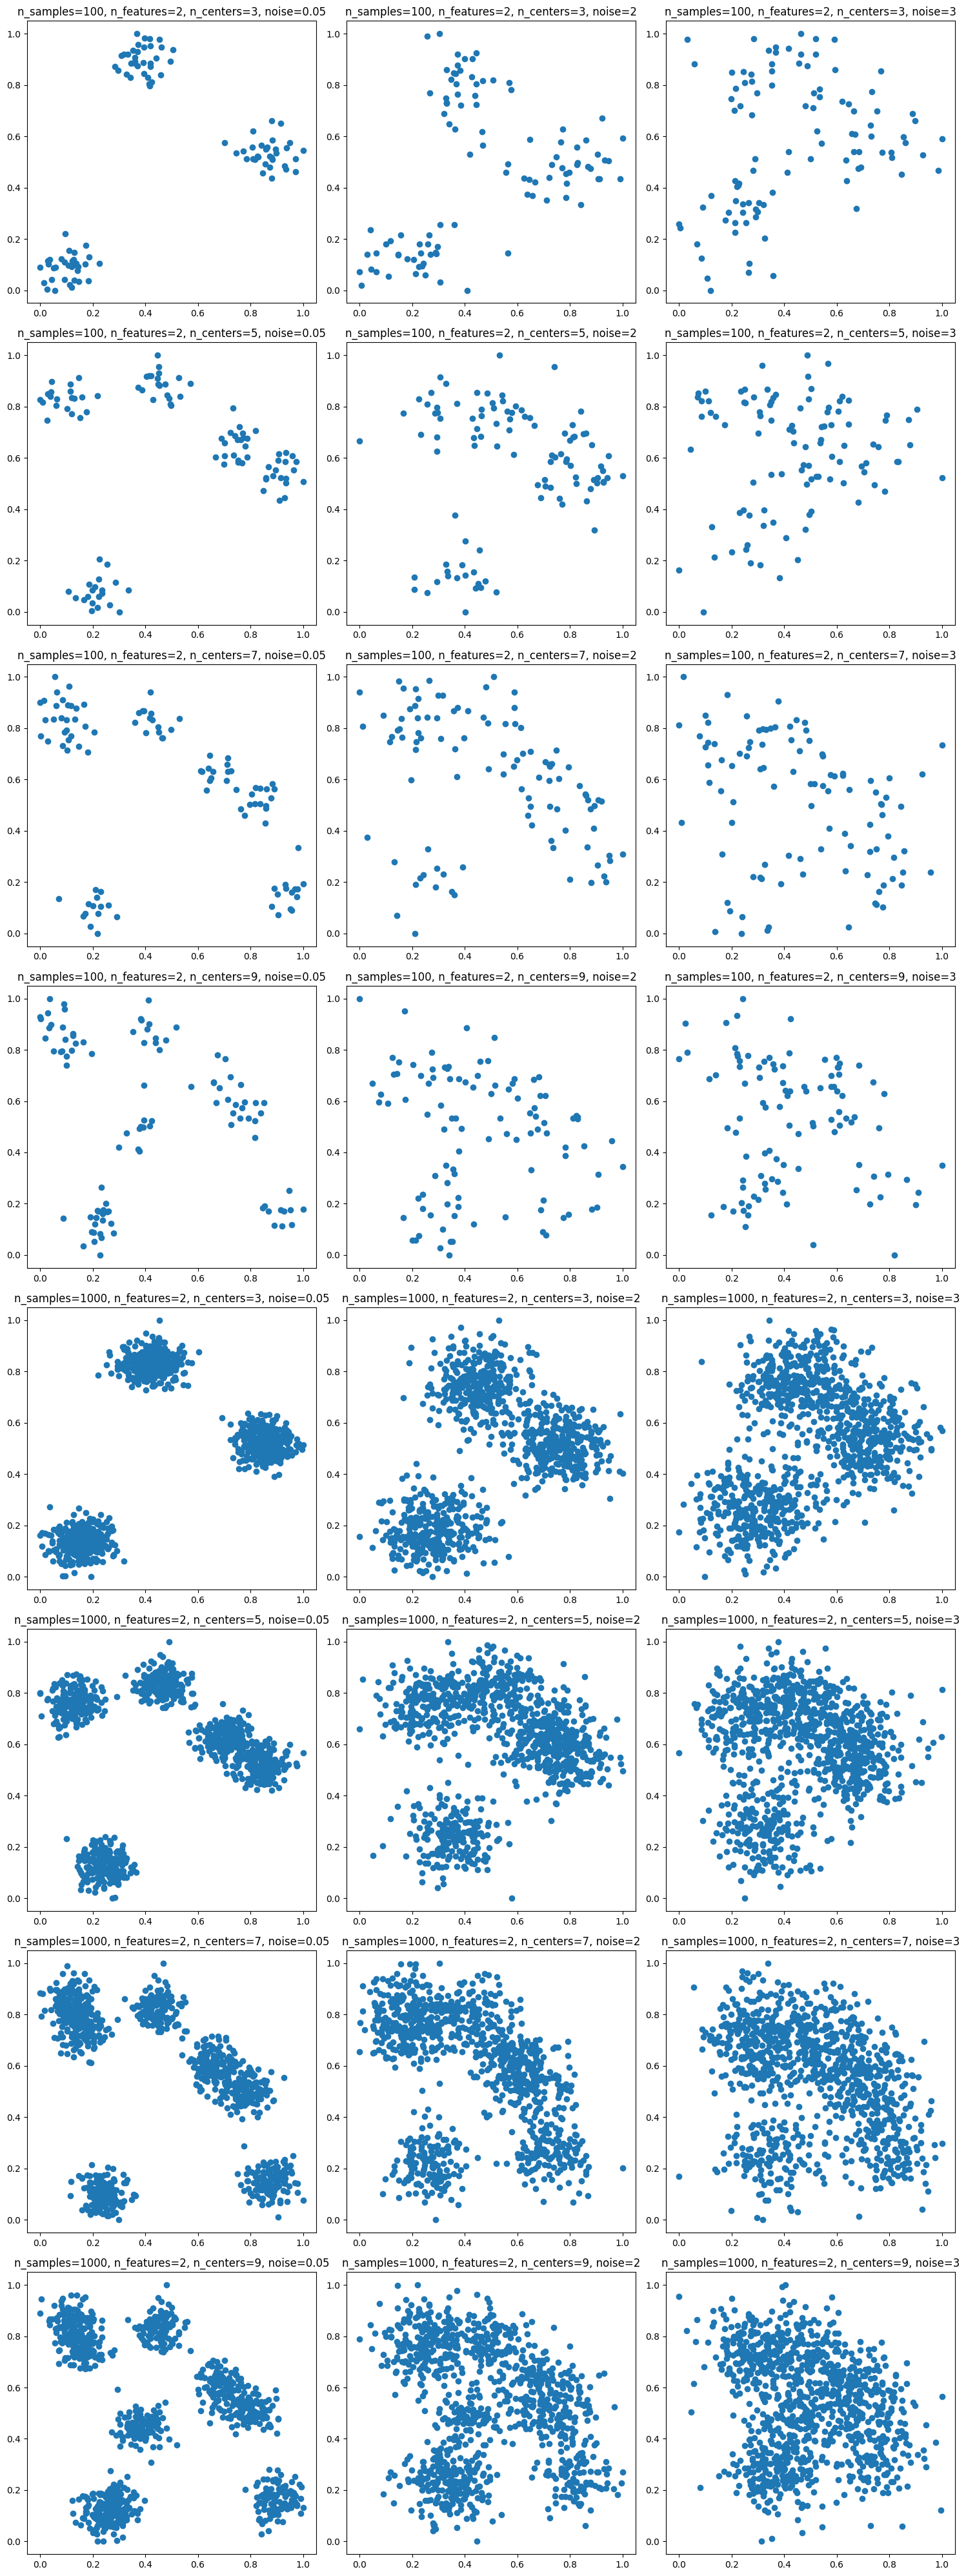

In [5]:
params_grid = {
    "n_samples": [100, 1000],
    "n_features": [2],
    "n_centers": [3, 5, 7, 9],
    "noise": [0.05, 2, 3],
}

permutations = list(itertools.product(*params_grid.values()))
fig, axs = plt.subplots(len(permutations) // 3, 3, figsize=(5 * 3, 5*len(permutations) // 3))

for i, params in enumerate(permutations):
    X = make_synthetic_data(*params)
    axs[i // 3, i % 3].scatter(X[:, 0], X[:, 1])
    axs[i // 3, i % 3].set_title(f"n_samples={params[0]}, n_features={params[1]}, n_centers={params[2]}, noise={params[3]}")

plt.tight_layout()
plt.show()



In [7]:
params_grid = {
    "n_samples": [1000],
    "n_features": [20],
    "n_centers": [5],
    "noise": [0.05],
}

permutations = list(itertools.product(*params_grid.values()))

for i, params in enumerate(permutations):
    X = make_synthetic_data(*params)
    df = pd.DataFrame(X)
    keys = params_grid.keys()
    df.to_csv(PREPROCESSED_DATA_DIR / 'synthetic' / f"synthetic.csv", index=False)
